In [1]:
import os
import math

import pickle
import pandas
import numpy

%matplotlib widget
import matplotlib
import matplotlib.pyplot

import datetime
import pytz


In [2]:
# Generalities
root_path = '/Users/matthieu/.ssh/ssh_to_graz/saved_graz_data/beetle/entrance/'

# all files
entrance_activity_files = [f for f in os.listdir(root_path) if f.endswith('.pickle')]
print("{} files found in folder".format(len(entrance_activity_files)))

entrance_metadata = []
all_data_dfs = [[]]*len(entrance_activity_files)

# Gathering of all data
for i_f, filename in enumerate(entrance_activity_files):
    datetime_str    = filename.split('/')[-1].split('_')[0]
    datetime_object = pytz.utc.localize(datetime.datetime.strptime(datetime_str[:-3], "%y%m%dT%H%M%S"))

    entrance_dp = {'dt_hr':datetime_str, 'dt':datetime_object, 'filename':filename}
    entrance_metadata.append(entrance_dp)

    all_data_dfs[i_f] = pandas.read_pickle(root_path + filename)

data = pandas.concat(all_data_dfs, ignore_index=True).sort_values(by='local_ts').reset_index(drop=True)

entrance_metadata = pandas.DataFrame.from_dict(entrance_metadata)
data


341 files found in folder


,local_ts,global_ts,event_type,origin,parameters,value,comments
0,2023-07-15 09:00:00.333333+00:00,None,Entrance activity,rpi5,"ftd=10,minarea=500,low_thres=50,high_thres=255",0,
1,2023-07-15 09:00:00.366667+00:00,None,Entrance activity,rpi5,"ftd=10,minarea=500,low_thres=50,high_thres=255",0,
2,2023-07-15 09:00:00.400000+00:00,None,Entrance activity,rpi5,"ftd=10,minarea=500,low_thres=50,high_thres=255",0,
3,2023-07-15 09:00:00.433333+00:00,None,Entrance activity,rpi5,"ftd=10,minarea=500,low_thres=50,high_thres=255",0,
4,2023-07-15 09:00:00.466667+00:00,None,Entrance activity,rpi5,"ftd=10,minarea=500,low_thres=50,high_thres=255",0,
...,...,...,...,...,...,...,...
60510989,2023-07-31 22:38:40.900000+00:00,None,Entrance activity,rpi5,"ftd=10,minarea=500,low_thres=50,high_thres=255",0,
60510990,2023-07-31 22:38:40.933333+00:00,None,Entrance activity,rpi5,"ftd=10,minarea=500,low_thres=50,high_thres=255",0,
60510991,2023-07-31 22:38:40.966667+00:00,None,Entrance activity,rpi5,"ftd=10,minarea=500,low_thres=50,high_thres=255",0,
60510992,2023-07-31 22:38:41+00:00,None,Entrance activity,rpi5,"ftd=10,minarea=500,low_thres=50,high_thres=255",0,


/var/folders/gp/4448rp494v37dvsvd0rwbyvw0000gn/T/ipykernel_13066/3868763226.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_day = data_day.resample('30 s').mean().rolling('5 min').mean()


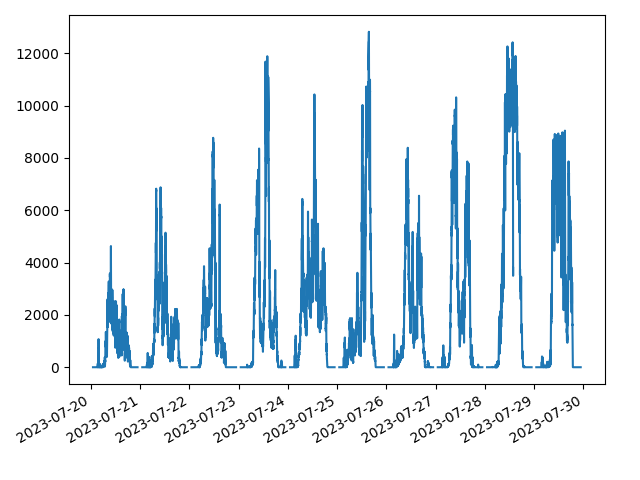

In [3]:
day_of_interest = pytz.utc.localize(datetime.datetime(2023, 7, 20, 0, 0, 0))

data_day = data[data.local_ts > day_of_interest]
data_day = data_day[data_day.local_ts < day_of_interest + datetime.timedelta(days=10)]

# subsample timewise (function mean is to take the mean on the 5 mins bins)
data_day.set_index('local_ts', inplace=True)
data_day = data_day.resample('30 s').mean().rolling('5 min').mean()

fig = matplotlib.pyplot.figure()
matplotlib.pyplot.plot(data_day.index, data_day.value)
fig.tight_layout()
matplotlib.pyplot.gcf().autofmt_xdate()

In [4]:
data_day.set_index('local_ts', inplace=True)
data_day.resample('5 min').mean().shape#(y='value')

KeyError: "None of ['local_ts'] are in the columns"